# Multivariable Regression

## Library & Data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # visualisation

In [2]:
#load the data
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/multivariate_housing_prices_in_portlans_oregon.csv')
df.head() 

,size(in square feet),number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
X = df.values[:, 0:2]  # get input values from first two columns
y = df.values[:, 2]  # get output values from last coulmn
m = len(y) # number of training examples

print('Total number of training examples (m) = %s \n' %(m))

# show only first 5 records
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

Total number of training examples (m) = 47 

x = [2104    3] , y = 399900
x = [1600    3] , y = 329900
x = [2400    3] , y = 369000
x = [1416    2] , y = 232000
x = [3000    4] , y = 539900


## Correlation

In [41]:
#plotting the interaction between the features
x = pd.DataFrame(X)
def myplotGrid(X,y):
    
    fig = plt.figure(figsize=(12,12))
    #columns names
    x.columns = ['size(in square feet)', 'number of bedrooms']
    x['y'] = y
    # checking the correlation of the variables
    sns.pairplot(x, hue='y')   
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 864x864 with 0 Axes>

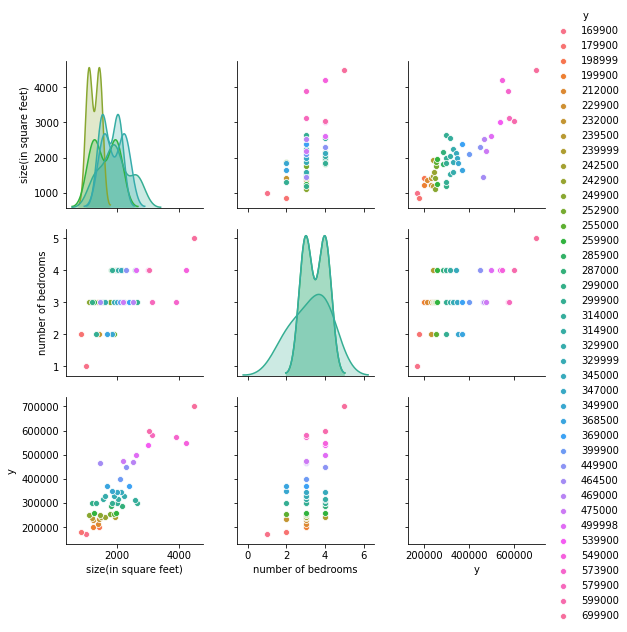

In [5]:
myplotGrid(x,y)

## Normalization

In [6]:
# mean Normalization
"""
The house and number of bedrooms are not in same range(house sizes are about 1000 times the number of bedrooms). 
This will have negative impact on gradient descent algorithm performance.
We can avoid this by changing the range of our input variables with mean normalization
"""
def feature_normalize(X):

    # we need mean of indivdual column here, hence axis = 0
    mean = np.mean(X, axis = 0)  
    # the parameter ddof (Delta Degrees of Freedom)  value is 1
    sd = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
    X_norm = (X - mean)/sd
    return X_norm, mean, sd

In [7]:
X, mean, sd = feature_normalize(X)
"""
New mean or avearage value of normalized X feature is 0
"""
print('mean= ', mean)
print('standard deviation= ', sd)
print('X_norm= ', X[:5])

mean=  [2000.68085106    3.17021277]
standard deviation=  [7.94702354e+02 7.60981887e-01]
X_norm=  [[ 0.13000987 -0.22367519]
 [-0.50418984 -0.22367519]
 [ 0.50247636 -0.22367519]
 [-0.73572306 -1.53776691]
 [ 1.25747602  1.09041654]]


In [8]:
# using hstack() function from numpy to add column of ones to X feature 
# the final X matrix (feature matrix)
X = np.hstack((np.ones((m,1)), X))
X[:5]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654]])

In [15]:
print(X.shape)
print(y.shape)

(47, 3)
(47,)


## Model

In [32]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((3,1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
    return theta, cost_list

In [33]:
iteration = 100
lr = 0.00000005
theta, cost_list = model(X, y, learning_rate = lr,
iteration = iteration)

## Prediction

In [40]:
new_houses = np.array([[1, 1547,2], [1, 1896,3], [1, 1934,3]]);
for house in new_houses :
    print("Our model predicts the price of house with",
    house[1], "sq. ft. area as : $", round(np.dot(house, theta)[1],
    3))

Our model predicts the price of house with 1547 sq. ft. area as : $ 1.649
Our model predicts the price of house with 1896 sq. ft. area as : $ 1.649
Our model predicts the price of house with 1934 sq. ft. area as : $ 1.649
